In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

In [46]:
dataset_dir = r'E:\dataset'  

# Load dataset
dataset = image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',  # Menggunakan label integer
    batch_size=32,
    image_size=(100, 100),  # Menyesuaikan ukuran gambar 
    shuffle=True
)

# Normalisasi dataset
normalization_layer = tf.keras.layers.Rescaling(1./255)
dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

Found 151 files belonging to 3 classes.


In [47]:
 # Konversi dataset ke numpy array
def dataset_to_numpy(dataset):
    X = []
    y = []
    for images, labels in dataset:
        for img, lbl in zip(images, labels):
            X.append(img.numpy().flatten())
            y.append(lbl.numpy())
    return np.array(X), np.array(y)

X, y = dataset_to_numpy(dataset)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Membuat model Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

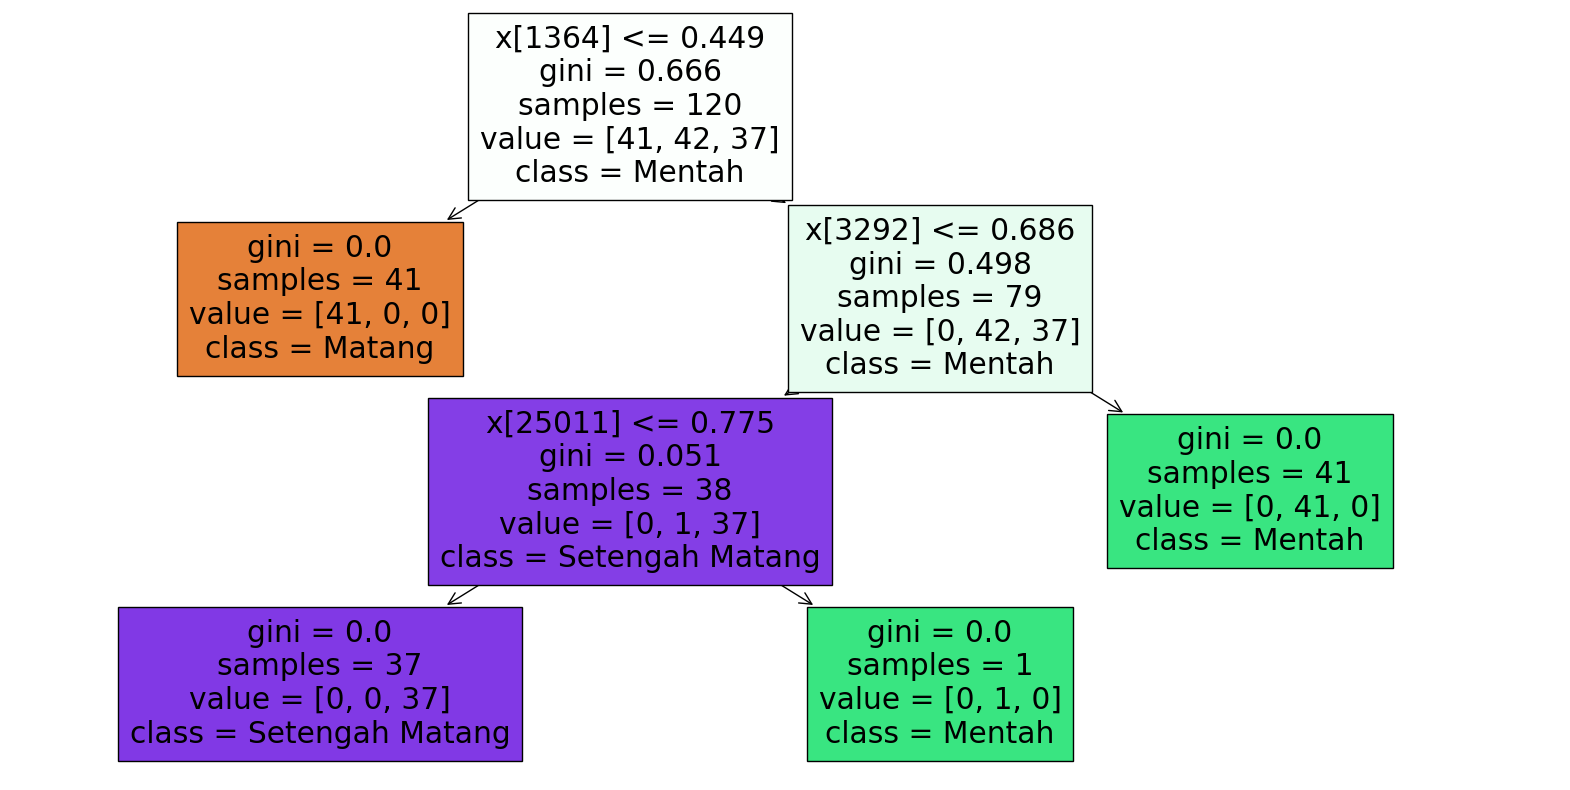

In [43]:
# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, class_names=["Matang", "Mentah", "Setengah Matang"])
plt.show()

In [44]:
# Mengevaluasi model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.32%
